Interacting Proteins

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import gseapy as gp
import re
import sys 

import cptac
import cptac.utils as u

import sys
sys.path.append('C:\\Users\\brittany henderson\\GitHub\\WhenMutationsDontMatter\\')
import plot_utils as p

In [3]:
def format_pval_annotation(pval_symbol, x1, x2, line_start = .05, line_height=.05):
    # for manual adjustment to pval annotations
    
    y, h = line_start, line_height
    plt.plot([x1, x1, x2, x2], #draw horizontal line
             [y, y+h, y+h, y], #vertical line
             lw=1.5, color= '.3')
    plt.text((x1+x2)*.5, # half between x coord
             y+h, pval_symbol, horizontalalignment='center', verticalalignment='bottom', color = "black")


In [4]:
gbm = cptac.Gbm()

cptac warning: This data is under a publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 1)


In [5]:
ip = u.get_interacting_proteins('PTEN')
len(ip)

28

In [6]:
gene = 'PTEN'

In [7]:
mut_type_gbm = gbm.get_genotype_all_vars(gene)

# merge cnv with genotype all mut type
prot_and_mutations = gbm.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'CNV', omics_genes = ip)
ip_df = prot_and_mutations.iloc[:,:-4]
mut_type_gbm = mut_type_gbm[['Mutation']]
merged = ip_df.join(mut_type_gbm)
print(merged['Mutation'].value_counts())

# slice certain mut type and wt
d = ['deletion']
del_gbm = merged['Mutation'].apply(lambda x: x == d) # slice out a list -> returns boolean
del_gbm = merged[del_gbm]

wt = ['Wildtype_Tumor']
wt_gbm = merged['Mutation'].apply(lambda x: x == wt)
wt_gbm = merged[wt_gbm]

[deletion]             81
[Wildtype_Tumor]       16
[Splice_Site]           1
[Missense_Mutation]     1
Name: Mutation, dtype: int64


cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 72 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 312)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-01834 (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\cptac\dataset.py, line 312)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 72 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 5)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-01834 (C:\Users\brittany henderson\Anaconda3\env

In [9]:
t_gbm = del_gbm.append(wt_gbm) 
# format binary col from list type to str
n = t_gbm[['Mutation']].astype(str)
t_gbm = t_gbm.iloc[:,:-1]
t_gbm = t_gbm.join(n)

cols = list(t_gbm.columns[:-1])

In [10]:
print('PTEN only sig comparison')
u.wrap_ttest(t_gbm, 'Mutation', cols, return_all = True)


PTEN only sig comparison


,Comparison,P_Value
0,PTEN_CNV,8.107378e-11
1,EGFR_CNV,1.684194e-02
2,PIK3R2_CNV,3.433825e-02
3,PTK2_CNV,8.889572e-02
4,USP7_CNV,1.115116e-01
5,INPP4B_CNV,1.251535e-01
6,MVP_CNV,1.998538e-01
7,CSNK2A2_CNV,2.098744e-01
8,SLC9A3R1_CNV,2.535843e-01
9,AKT1_CNV,2.754520e-01


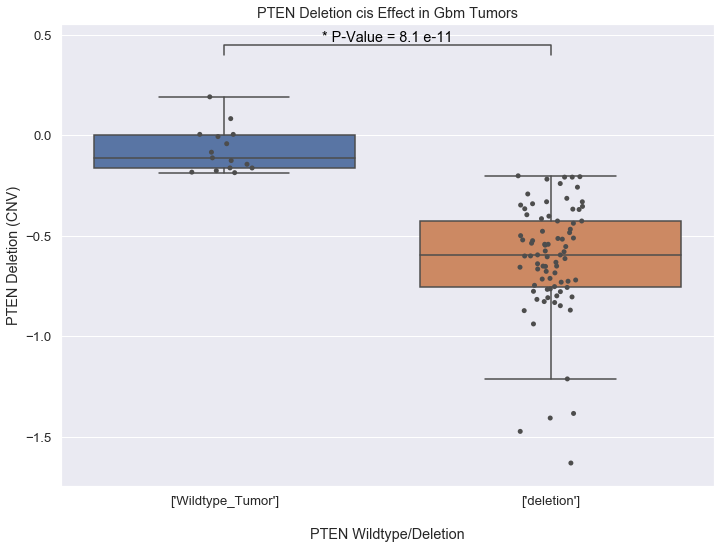

In [18]:
#cis
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=gene+"_CNV", data = t_gbm,
                      order = ["['Wildtype_Tumor']", "['deletion']"], showfliers = False)    
boxplot.set_title('PTEN Deletion cis Effect in Gbm Tumors')
boxplot = sns.stripplot(x='Mutation', y=gene+"_CNV", data = t_gbm, jitter = True, 
                           color = ".3", order = ["['Wildtype_Tumor']", "['deletion']"], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/Deletion", ylabel = gene+' Deletion (CNV)')

format_pval_annotation('* P-Value = 8.1 e-11', 0, 1, .4)

plt.show()
plt.clf()
plt.close()

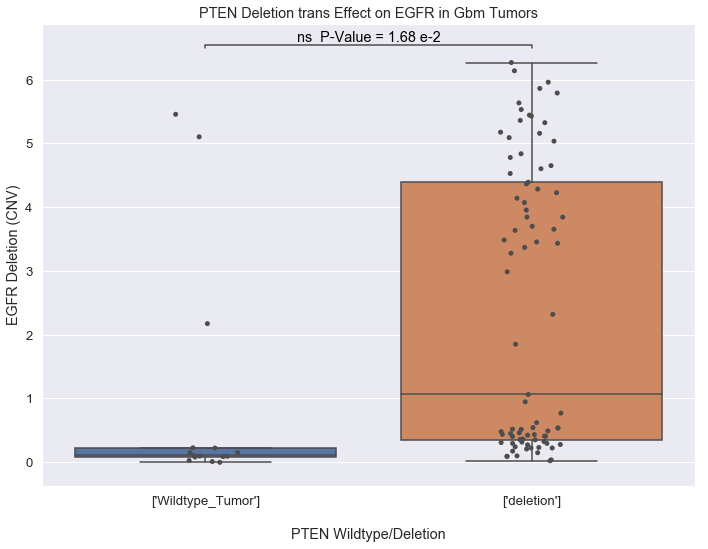

In [17]:
#trans
g = 'EGFR'
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=g+"_CNV", data = t_gbm,
                      order = ["['Wildtype_Tumor']", "['deletion']"], showfliers = False)    
boxplot.set_title('PTEN Deletion trans Effect on '+g+' in Gbm Tumors')
boxplot = sns.stripplot(x='Mutation', y=g+"_CNV", data = t_gbm, jitter = True, 
                           color = ".3", order = ["['Wildtype_Tumor']", "['deletion']"], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/Deletion", ylabel = g+' Deletion (CNV)')

format_pval_annotation('ns  P-Value = 1.68 e-2', 0, 1, 6.5)

plt.show()
plt.clf()
plt.close()

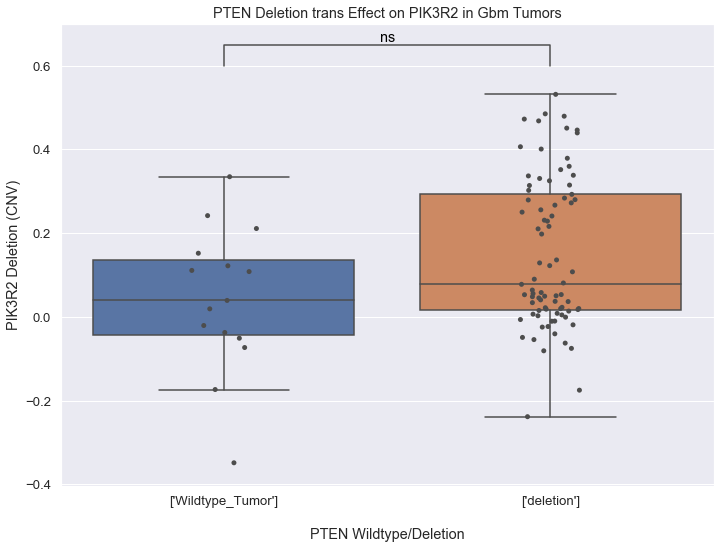

In [23]:
#trans
g = 'PIK3R2'
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=g+"_CNV", data = t_gbm,
                      order = ["['Wildtype_Tumor']", "['deletion']"], showfliers = False)    
boxplot.set_title('PTEN Deletion trans Effect on '+g+' in Gbm Tumors')
boxplot = sns.stripplot(x='Mutation', y=g+"_CNV", data = t_gbm, jitter = True, 
                           color = ".3", order = ["['Wildtype_Tumor']", "['deletion']"], dodge = True)
boxplot.set(xlabel = "\nPTEN Wildtype/Deletion", ylabel = g+' Deletion (CNV)')

format_pval_annotation('ns', 0, 1, .6)

plt.show()
plt.clf()
plt.close()

In [166]:
del_med = del_gbm.median()
wt_med = wt_gbm.median()

gbm_d = {}

for prot in ip:
    dif_gbm = del_med[prot+'_CNV'] - wt_med[prot+'_CNV']
    gbm_d[prot] = dif_gbm
    print(del_med[prot+'_CNV'], '-', wt_med[prot+'_CNV'], '=',dif_gbm)

gbm_df = pd.DataFrame.from_dict(gbm_d, orient='index', columns=['Gbm'])
gbm_df